### Question (1): (10pt)

Suppose that the independent variable $x$ has n observations: $(x_1,x_2,...x_n)$ and the dependent variable $y$ has corresponding observations: $(y_1, y_2,...,y_n)$. If the correlation between these two sequences $corr(x,y)=0.01$, which of the following statements are true? Please select all the right answers.

(a) There should be no strong relation between $x$ and $y$.

(b) There could be some strong linear relationship between $x$ and $y$.

(c) If we build a linear regression between $y$ and $x$ as $y=wx$, we could conclude that the OLS estimation for $w$ should be around 0.01. **TRUE**

(d) Certain relation between $x$ and $y$ could still exist, but it should be non-linear. **TRUE** 

### Question (2): (10pt)



Consider a model

$y=x^{b}$ where $b>0$. 

Now, suppose x doubles (originally $x>0$). How would y change with respect to this change of x? Let us denote new $y$ as $y'$. Please select all the right answers from below. 

(a) $y'>2y$ if b is bigger than one. **TRUE**

(b) $y'<2y$ if b is less than one.** TRUE **

(c) $y'=2y$ in any case. **(FALSE:  Only when $b = 1$)**

(d) $y'$ increases by $(2^b-1)*100\%$. **(TRUE: Not when $x < 1$, but in a regression model this situation rarely happens and can be solved by changing measurement units)**

In [5]:
#Tests

def test(x,b,test): 
    
    def f(x,b):
        return x**b
    
    y = f(x,b)
    x_ = 2 * x
    y_ = f(x_,b)
    
    print 'y: ',y
    print "y':",y_
    print '2y:',2*y
    
    if test == 'A':
        return y_ > 2*y
    elif test == 'B':
        return y_ < 2*y
    elif test == 'C':
        return y_ == 2*y
    elif test == 'D':
        print ((y_ - y)/y)
        print (2**b - 1)
        return ((y_ - y)/y) == (2**b - 1)

print '\n' +  'TEST A'     

for i in [0.5,1,2]:
    print 'x:',i,test(x=i,b=2,test='A')

print '\n' + 'TEST B'
for i in [0.5,1,2]:
    print 'x:',i,test(x=i,b=0.5,test='B')
    
print '\n' + 'TEST C with b < 1'
for i in [0.5,1,2]:
    print 'x:',i,test(x=i,b=0.5,test='C')

print '\n' + 'TEST C with b > 1'
for i in [0.5,1,2]:
    print 'x:',i,test(x=i,b=2,test='C')
    
print '\n' + 'TEST C with b = 1'
for i in [0.5,1,2]:
    print 'x:',i,test(x=i,b=1,test='C')

print '\n' + 'TEST D with b < 1'
for i in [0.5,1,2]:
    print 'x:',i,test(x=i,b=0.5,test='D')
    
print '\n' + 'TEST D with b > 1'
for i in [0.5,1,2]:
    print 'x:',i,test(x=i,b=2,test='D')

print '\n' + 'TEST D with b = 1'
for i in [0.5,1,2]:
    print 'x:',i,test(x=i,b=1,test='D')


 
TEST A
x: 0.5 y:  0.25
y': 1.0
2y: 0.5
True
x: 1 y:  1
y': 4
2y: 2
True
x: 2 y:  4
y': 16
2y: 8
True

TEST B
x: 0.5 y:  0.707106781187
y': 1.0
2y: 1.41421356237
True
x: 1 y:  1.0
y': 1.41421356237
2y: 2.0
True
x: 2 y:  1.41421356237
y': 2.0
2y: 2.82842712475
True

TEST C with b < 1
x: 0.5 y:  0.707106781187
y': 1.0
2y: 1.41421356237
False
x: 1 y:  1.0
y': 1.41421356237
2y: 2.0
False
x: 2 y:  1.41421356237
y': 2.0
2y: 2.82842712475
False

TEST C with b > 1
x: 0.5 y:  0.25
y': 1.0
2y: 0.5
False
x: 1 y:  1
y': 4
2y: 2
False
x: 2 y:  4
y': 16
2y: 8
False

TEST C with b = 1
x: 0.5 y:  0.5
y': 1.0
2y: 1.0
True
x: 1 y:  1
y': 2
2y: 2
True
x: 2 y:  2
y': 4
2y: 4
True

TEST D with b < 1
x: 0.5 y:  0.707106781187
y': 1.0
2y: 1.41421356237
0.414213562373
0.414213562373
False
x: 1 y:  1.0
y': 1.41421356237
2y: 2.0
0.414213562373
0.414213562373
True
x: 2 y:  1.41421356237
y': 2.0
2y: 2.82842712475
0.414213562373
0.414213562373
False

TEST D with b > 1
x: 0.5 y:  0.25
y': 1.0
2y: 0.5
3.0
3
True
x:

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
from math import sqrt
%matplotlib inline

### Question (3): (30 pt)


In [7]:
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [8]:
y=[28.0, 24.0, 37.0, -7.0, 28.0, 71.0, 89.0, 60.0, 100.0, 108.0, 116.0, 
   110.0, 114.0, 123.0, 124.0, 165.0, 169.0, 211.0, 211.0, 208.0]

#### (a) Calculate corr(x,y) without using a build-in function for the correlation coefficient.

In [9]:
N = len(x)

meanX = sum(x)/N
meanY = sum(y)/N

sumCov = 0
sumStdX = 0
sumStdY = 0


for i in range(N):
    #diference arround the mean for each element
    diferenceMeanX = (x[i] - meanX)
    diferenceMeanY = (y[i] - meanY)
    
    sumStdX = sumStdX + diferenceMeanX**2
    sumStdY = sumStdY + diferenceMeanY**2
    
    multDiferenceMean = diferenceMeanX * diferenceMeanY
    sumCov = sumCov + multDiferenceMean
    
    
    

covXY =  sumCov/N
varX = sumStdX/N
varY = sumStdY/N
stdX = sqrt(varX) 
stdY = sqrt(varY)

corrXY = covXY/(stdX*stdY)
print 'The correlation coefficient is: %1.2f' %corrXY



The correlation coefficient is: 0.96


#### (b) Estimate linear model $y=w_1*x+w_0$ using OLS formulas and without using build-in functions for the linear regression. What is  $w_1$ and $w_0$? What is $R^2$?

In [10]:
w1 = covXY/varX
print 'w1:',w1

w0 = (sum(y) - w1*sum(x))/N
print 'w0:', w0

r2 = corrXY**2
print 'R2:',r2

w1: 10.6265151515
w0: 3.49810606061
R2: 0.923063996834


#### (c) Use regression function to double check your answer making sure that your calculation is correct. 

In [11]:
data = pd.DataFrame({'x':x,'y':y})
lm = smf.ols(formula='y ~ x', data = data).fit()

print lm.params
print lm.rsquared

Intercept     4.257143
x            10.546617
dtype: float64
0.91612366603


### Question (4): (30pt) 

For the data below estimate a model: AssessTot = w* LotArea (with and without intercept)

LotArea: Total area of the tax lot

AssessTot: The actual assessed total value of Final Year 2015

In [3]:
data_4=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/Session02/Housing_Pluto_Session2.csv")

In [4]:
data_4.head()

,ZipCode,LotArea,AssessTot
0,11201.0,151930,1164645
1,11201.0,9620,5864850
2,11201.0,19682,12019950
3,NaN,0,0
4,11201.0,387060,0


#### (a). As we see, this data set is not clean.  Drop all the rows which contain "NaN" and 0 terms.

In [5]:
dataNonEmpty = data_4.copy().dropna(axis=0,how='any')
dataNonEmpty.head()
zeroValues = (dataNonEmpty['LotArea']==0) | (dataNonEmpty['AssessTot']==0)
print 'rows with zeroes:',sum(zeroValues)
print 'data shape before:', dataNonEmpty.shape
print 'data shape before:', dataNonEmpty[~zeroValues].shape
dataNonEmpty = dataNonEmpty[~zeroValues]
dataNonEmpty.head()

rows with zeroes: 941
data shape before: (276923, 3)
data shape before: (275982, 3)


,ZipCode,LotArea,AssessTot
0,11201.0,151930,1164645
1,11201.0,9620,5864850
2,11201.0,19682,12019950
5,11201.0,6384,21150
10,11201.0,66889,11700


#### (b). Visualize the data set.

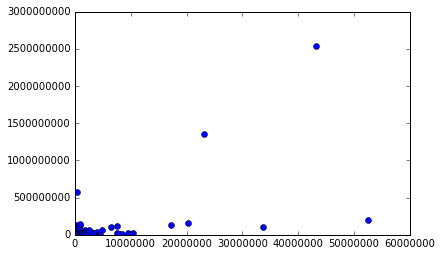

In [6]:
plt.plot(dataNonEmpty['LotArea'],dataNonEmpty['AssessTot'],'o')
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)


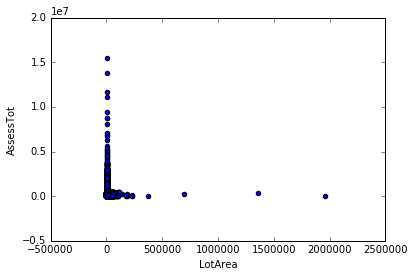

In [7]:
#Remove outliers to check data without them
outlierThres = dataNonEmpty.quantile([.05,.95]).iloc[:,1:]

noOutlierAssessTot = (dataNonEmpty['AssessTot'] > outlierThres['AssessTot'].loc[0.05]) & (dataNonEmpty['AssessTot'] < outlierThres['AssessTot'].loc[0.95])

noOtlierLotArea = (dataNonEmpty['LotArea'] > outlierThres['LotArea'].loc[0.05]) & (dataNonEmpty['LotArea'] < outlierThres['LotArea'].loc[0.95])

dataNoOutlier = dataNonEmpty.copy()[noOutlierAssessTot | noOtlierLotArea]

dataNoOutlier.plot(kind='scatter',x='LotArea',y='AssessTot')

#### (c).  Build a model : AssessTot=$w_1$*LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  Plot your results together with observations. 

In [8]:
lm2 = smf.ols(formula='AssessTot ~ LotArea', data = dataNonEmpty).fit()
print lm2.summary()
 

                            OLS Regression Results                            
Dep. Variable:              AssessTot   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Sun, 25 Sep 2016   Prob (F-statistic):               0.00
Time:                        12:10:50   Log-Likelihood:            -4.6221e+06
No. Observations:              275982   AIC:                         9.244e+06
Df Residuals:                  275980   BIC:                         9.244e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   7.694e+04   8648.667      8.897      0.0

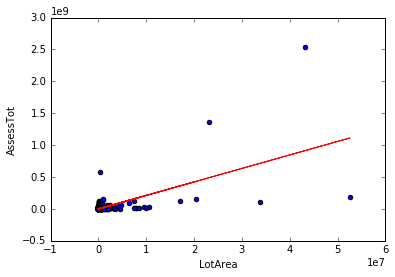

In [9]:
dataNonEmpty.plot(kind='scatter',x='LotArea',y='AssessTot')
plt.plot(dataNonEmpty.LotArea,lm2.predict(),'r-')

The model shows a statistically significant parameters for both the intercep and the slope coefficient (at levels of confidence above 99%). A base price of houses (Intercept) of USD 76,940, wich increases by USD 21.16 for each unit that the Total area of the tax lot increases. The overall model show to be statistically significant ( by the F-statistic, at levels of confidence above 99% ). The total variance accounted by the model ($R^2$) is 38.4% . Nevertheless, the plot of the data (with or without outliers) is cause of warning. In one hand, there are several outliers, that are affecting the model performance. In the other hand, without them, there is still a misleading pattern, as there are several cases with the same area, but whit differences in the price, while at the same time, other properties with different area, have relatively the same price.     

#### (d) Repeat (c) without intercept, i.e. with $w_2=0$.

In [10]:
dataNonEmpty['LotAreaCentered'] = (dataNonEmpty.LotArea - dataNonEmpty.LotArea.mean())/dataNonEmpty.LotArea.std()
dataNonEmpty['AssessTotCentered'] = (dataNonEmpty.AssessTot - dataNonEmpty.AssessTot.mean())/dataNonEmpty.AssessTot.std()
dataNonEmpty.describe()

,ZipCode,LotArea,AssessTot,LotAreaCentered,AssessTotCentered
count,275982.000000,2.759820e+05,2.759820e+05,2.759820e+05,2.759820e+05
mean,11220.410462,5.129028e+03,1.854764e+05,5.227380e-16,6.455896e-16
std,11.212166,1.696151e+05,5.788449e+06,1.000000e+00,1.000000e+00
min,11201.000000,1.000000e+00,1.000000e+00,-3.023332e-02,-3.204234e-02
25%,11210.000000,1.901000e+03,2.251900e+04,-1.903149e-02,-2.815218e-02
50%,11220.000000,2.139000e+03,3.078000e+04,-1.762831e-02,-2.672503e-02
75%,11230.000000,2.828000e+03,4.971400e+04,-1.356617e-02,-2.345403e-02
max,11416.000000,5.259196e+07,2.539648e+09,3.100363e+02,4.387122e+02


In [11]:
lm3 = smf.ols(formula='AssessTotCentered ~ LotAreaCentered', data = dataNonEmpty).fit()
print lm3.summary()

                            OLS Regression Results                            
Dep. Variable:      AssessTotCentered   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Sun, 25 Sep 2016   Prob (F-statistic):               0.00
Time:                        12:10:54   Log-Likelihood:            -3.2464e+05
No. Observations:              275982   AIC:                         6.493e+05
Df Residuals:                  275980   BIC:                         6.493e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        1.735e-18      0.001   1.

### Question (5): (20pt)

For the same data as above try the model: log_AssessTot=$w_1$*log_LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  And plot your results together with observations. Explain the result - what does the estimated "$w_1$" means to you?

                            OLS Regression Results                            
Dep. Variable:           LogAssessTot   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 2.659e+05
Date:                Sun, 25 Sep 2016   Prob (F-statistic):               0.00
Time:                        12:10:58   Log-Likelihood:            -3.4460e+05
No. Observations:              275982   AIC:                         6.892e+05
Df Residuals:                  275980   BIC:                         6.892e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2074      0.020     10.275      0.0

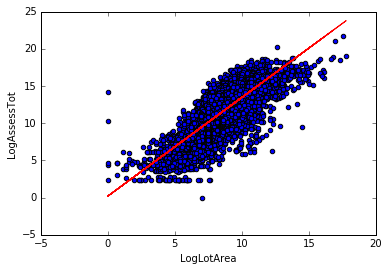

In [12]:
dataNonEmpty['LogLotArea'] = np.log(dataNonEmpty['LotArea'])
dataNonEmpty['LogAssessTot'] = np.log(dataNonEmpty['AssessTot'])
lm4 = smf.ols(formula='LogAssessTot ~ LogLotArea', data = dataNonEmpty).fit()
print lm4.summary()
dataNonEmpty.plot(kind='scatter',x='LogLotArea',y='LogAssessTot')
plt.plot(dataNonEmpty.LogLotArea,lm4.predict(),'r-')

With the new specification of the model, the overall R2 increases to a 49.1 %. The statistical significance of both parameters (Intercept and slope) as well as the one of the model as a whole, stands. A reading of the model could be: as the total lot area increases by 1%, the assessed total valuen increases by 1.3%. In conclusion, the specification is an improvement in relation with the previous one.

### *Additional extra-credit question (Using the housing price data set from question (4)) (40 pt to be added to the cumulative homework score up to the maximum of 100%(for whole semester))

#### (a) How many different zip codes are in the data? report the number of observations for each zipcode.

In [13]:
#data with out NaN or 0s will be used
uniqueZipCodes = dataNonEmpty.ZipCode.unique()
print 'The are %d unique ZipCodes in the data' %len(uniqueZipCodes)

The are 41 unique ZipCodes in the data


In [14]:
zipCodesCount = dataNonEmpty.ZipCode.value_counts()
print 'Count for each zipcode:'
print zipCodesCount

Count for each zipcode:
11234.0    19318
11236.0    14612
11229.0    12063
11207.0    11413
11208.0    11284
11203.0    11011
11223.0    10322
11204.0     9946
11214.0     9513
11221.0     9186
11215.0     9056
11220.0     9015
11219.0     8656
11210.0     8540
11209.0     8451
11233.0     8014
11230.0     7987
11235.0     7941
11228.0     7857
11218.0     6905
11212.0     6578
11216.0     6113
11211.0     5462
11226.0     5336
11222.0     5311
11213.0     5076
11238.0     4876
11231.0     4838
11206.0     4665
11237.0     4390
11217.0     4035
11225.0     3920
11201.0     3361
11205.0     3196
11232.0     2946
11224.0     2798
11249.0     1561
11239.0      424
11416.0        4
11251.0        1
11241.0        1
Name: ZipCode, dtype: int64


#### (b) For each zip code having over 1000 observations, report the average assessed total value of houses.

In [16]:
smallZipCodes = zipCodesCount.index[zipCodesCount.values < 1000]
smallZipCodes


Float64Index([11239.0, 11416.0, 11251.0, 11241.0], dtype='float64')

In [17]:
zipInSmallZipCodes = dataNonEmpty.ZipCode.isin(smallZipCodes.values) 
dataBigZip = dataNonEmpty.copy()[~zipInSmallZipCodes]
dataBigZip.head()

,ZipCode,LotArea,AssessTot,LotAreaCentered,AssessTotCentered,LogLotArea,LogAssessTot
0,11201.0,151930,1164645,0.865495,0.169159,11.931175,13.967927
1,11201.0,9620,5864850,0.026477,0.981156,9.171600,15.584487
2,11201.0,19682,12019950,0.085800,2.044498,9.887460,16.302078
5,11201.0,6384,21150,0.007399,-0.028389,8.761550,9.959395
10,11201.0,66889,11700,0.364118,-0.030021,11.110790,9.367344


In [18]:
groupbyZipCode = dataBigZip['AssessTot'].groupby(dataBigZip['ZipCode'])
AssesTotAveBigZip = (groupbyZipCode.mean()/1000).apply(lambda x: '%.2f' % x)

print 'Average assessed total value of houses in thousands of dollars by selected Zipcodes'
print AssesTotAveBigZip

Average assessed total value of houses in thousands of dollars by selected Zipcodes
ZipCode
11201.0    1672.25
11203.0     121.02
11204.0     104.54
11205.0     350.94
11206.0     311.53
11207.0     100.34
11208.0      86.44
11209.0     173.19
11210.0     119.47
11211.0     249.30
11212.0     166.43
11213.0     169.62
11214.0     127.06
11215.0     169.72
11216.0     125.11
11217.0     483.30
11218.0     130.89
11219.0     140.74
11220.0     134.55
11221.0      90.60
11222.0     203.41
11223.0     103.47
11224.0     309.68
11225.0     219.10
11226.0     259.17
11228.0      67.13
11229.0     308.22
11230.0     148.87
11231.0     187.08
11232.0     386.08
11233.0      83.36
11234.0     154.84
11235.0     216.93
11236.0      77.65
11237.0     152.95
11238.0     265.26
11249.0     714.63
Name: AssessTot, dtype: object


#### (c) For each zip code estimate the log scale model 'log_AssessTot ~ log_LotArea' and report the slope coefficient (scaling exponent).


In [19]:
groupedData = dataNonEmpty.loc[:,['ZipCode','LogLotArea','LogAssessTot']].groupby('ZipCode',as_index=False)


In [93]:
zips = []
slopes = []
for i in groupedData:
    zips.append(i[0])
    lm = smf.ols(formula='LogAssessTot ~ LogLotArea', data = i[1]).fit()
    slopes.append(lm.params.LogLotArea)

slopeByZip = pd.DataFrame({'ZipCode':zips,'Slopes':slopes})
slopeByZip


,Slopes,ZipCode
0,1.405662,11201.0
1,1.391849,11203.0
2,1.280166,11204.0
3,1.503683,11205.0
4,1.487366,11206.0
5,1.341991,11207.0
6,1.164593,11208.0
7,1.249751,11209.0
8,1.245899,11210.0
9,1.412142,11211.0


#### (d) Visualize the spatial distribution of the values from (b) and (c). Report the top 5 zip code with highest scaling exponents.

,Slopes,ZipCode
37,1.788466,11241.0
14,1.649113,11216.0
35,1.621558,11238.0
19,1.592814,11221.0
11,1.584304,11213.0


In [31]:
import geopandas as gpd
from shapely.geometry import Point
from random import randint, uniform
from datetime import datetime
from urllib import urlretrieve
from zipfile import ZipFile
import os

In [32]:
import seaborn as sns
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [48]:
#Function based on the one for boroughs in http://blog.yhat.com/posts/interactive-geospatial-analysis.html
def get_nycZip_shape_file(url, filename):

    # download file
    zipped = filename + '.zip'
    urlretrieve(url, zipped)
    zipped = os.getcwd() + '/' + zipped

    # unzip file
    to_unzip = ZipFile(zipped, 'r')
    unzipped = os.getcwd() + '/' + filename + '_unzipped'
    to_unzip.extractall(unzipped)
    to_unzip.close()

    # get shape file
    for file in os.listdir(unzipped):
        if file.endswith(".shp"):
            shape_file =  unzipped + '/' + file

    # return full file path
    return shape_file

In [54]:
# get shape file path
shape_file_url = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'
shape_file_dir = 'nyc_zip'
file_path = get_nycZip_shape_file(shape_file_url,shape_file_dir)
#!rm (filename + '.zip')

In [131]:
gdf = gpd.GeoDataFrame.from_file(file_path)
gdf = gdf.loc[:,['CTY_FIPS','ZIPCODE','geometry']]
print gdf.shape
gdf.head()

(263, 3)


,CTY_FIPS,ZIPCODE,geometry
0,081,11436,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,047,11213,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,047,11212,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,047,11225,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,047,11218,"POLYGON ((991997.1134308875 176307.4958601296,..."


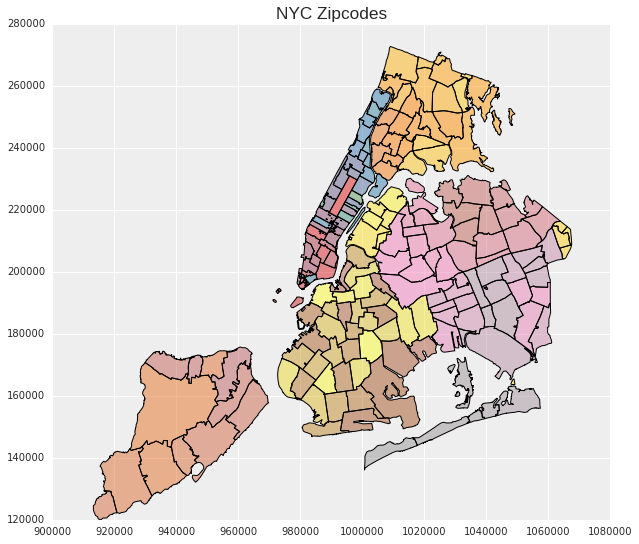

In [199]:
gdf.plot(column='ZIPCODE')
plt.title('NYC Zipcodes')

## Figure 1
Zipcodes for the NYC area

In [133]:
#prepare data for join
#AssesTotAveBigZip only contains the zip with more than 1000 cases. This will serve as base
assesMean = pd.DataFrame(AssesTotAveBigZip)
assesMean['ZIPCODE'] = assesMean.index.astype(int)
print assesMean.shape
assesMean.head()

(37, 2)


,AssessTot,ZIPCODE
ZipCode,,
11201.0,1672.25,11201
11203.0,121.02,11203
11204.0,104.54,11204
11205.0,350.94,11205
11206.0,311.53,11206


In [134]:
#preparing slope data
slopeDF = slopeByZip.copy()
slopeDF.index = slopeDF.ZipCode.astype(int)
slopeDF = slopeDF.drop('ZipCode', 1)
print slopeDF.shape
slopeDF.head()

(41, 1)


,Slopes
ZipCode,
11201,1.405662
11203,1.391849
11204,1.280166
11205,1.503683
11206,1.487366


In [183]:
#Slope has 41 unique zips codes, only the 37 ones with more than a 1000 records will remain
assesData = pd.concat([assesMean, slopeDF], axis=1, join='inner')
print assesData.shape
assesData

(37, 3)


,AssessTot,ZIPCODE,Slopes
ZipCode,,,
11201,1672.25,11201,1.405662
11203,121.02,11203,1.391849
11204,104.54,11204,1.280166
11205,350.94,11205,1.503683
11206,311.53,11206,1.487366
11207,100.34,11207,1.341991
11208,86.44,11208,1.164593
11209,173.19,11209,1.249751
11210,119.47,11210,1.245899


In [190]:
assesData.ZIPCODE = assesData.ZIPCODE.astype(str)
assesData.AssessTot = assesData.AssessTot.astype(float) 
zipMap = gdf.merge(assesData,on='ZIPCODE')
print type(zipMap.AssessTot[0])
print zipMap.shape
zipMap.head()

<type 'numpy.float64'>
(38, 5)


,CTY_FIPS,ZIPCODE,geometry,AssessTot,Slopes
0,047,11213,"POLYGON ((1001613.712964058 186926.4395172149,...",169.62,1.584304
1,047,11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",166.43,1.484992
2,047,11225,"POLYGON ((995908.3654508889 183617.6128015518,...",219.10,1.578187
3,047,11218,"POLYGON ((991997.1134308875 176307.4958601296,...",130.89,1.282553
4,047,11226,"POLYGON ((994821.4729396403 177865.7178093046,...",259.17,1.386247


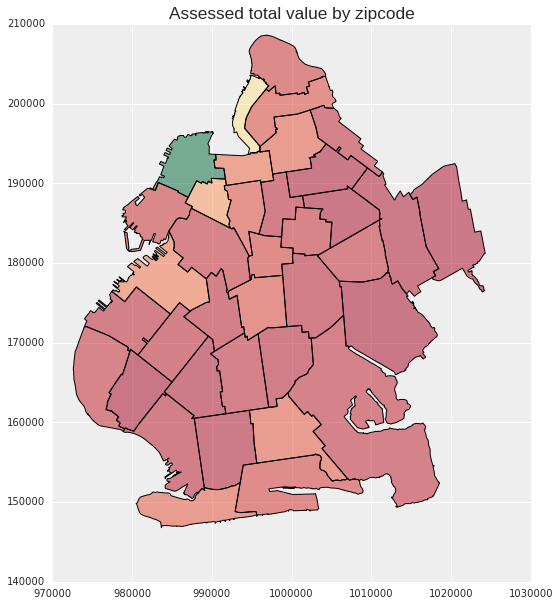

In [195]:
zipMap.plot(column= 'AssessTot', cmap='RdYlGn')
plt.title('Assessed total value by zipcode')

## Figure 2:
The map clearly shows the Brooklyn Heights neighbourhood as an outlier, with the highest assessed total value. This obscures the analysis for the spatial distribution of the assessed total value.

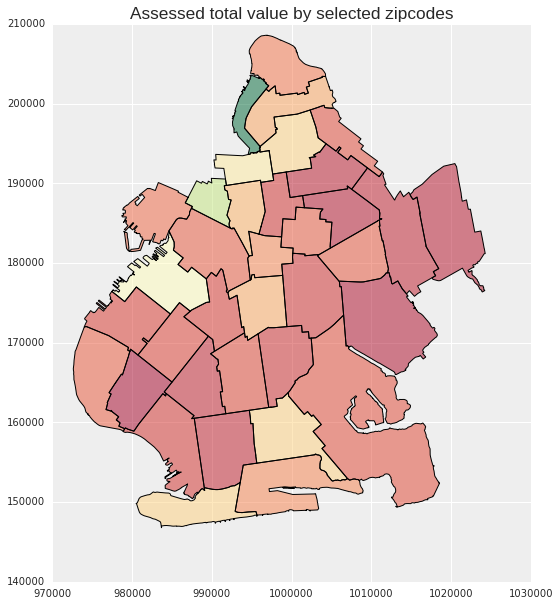

In [212]:
zipMap.loc[~(zipMap.ZIPCODE == '11201'),:].plot(column= 'AssessTot', cmap='RdYlGn')
plt.title('Assessed total value by selected zipcodes')

## Figure 3
Removing Brooklyn Heights from the analysis, shows that the areas surrounding that neighbourhood are, as expected, the ones with highest assessed total value. Even so, the spatial distribution remains fairly concentrated with the highest values locating in that area close to downtown Manhattan

In [194]:
assesData.sort_values(['AssessTot'], ascending=False).head()

,AssessTot,ZIPCODE,Slopes
ZipCode,,,
11201,1672.25,11201,1.405662
11249,714.63,11249,1.242015
11217,483.30,11217,1.415730
11232,386.08,11232,1.378675
11205,350.94,11205,1.503683


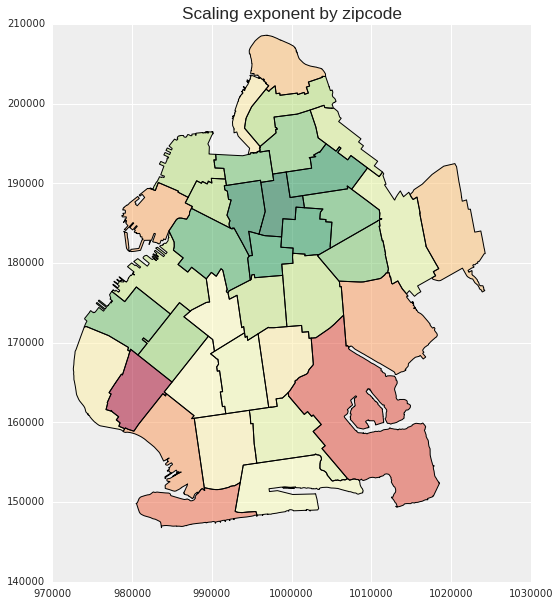

In [196]:
zipMap.plot(column='Slopes', cmap='RdYlGn')
plt.title('Scaling exponent by zipcode')

## Figure 4
   The scaling exponent map, wich relates the percentual increase on the price by percentual increase in the area, shows the neighbourhoods with the highest exponents: Bedford Stuyvesant, Prospect Heights, Bushwick and Crown Heights.		

In [197]:
slopeByZip.sort_values(['Slopes'], ascending=False).head()

,Slopes,ZipCode
37,1.788466,11241.0
14,1.649113,11216.0
35,1.621558,11238.0
19,1.592814,11221.0
11,1.584304,11213.0
